In [43]:
import gymnasium
import random
import matplotlib.pyplot as plt

Epoch 0 : -200.0
Epoch 100 : -200.0
Epoch 200 : -200.0
Epoch 300 : -200.0
Epoch 400 : -200.0
Epoch 500 : -200.0
Epoch 600 : -200.0
Epoch 700 : -198.81
Epoch 800 : -199.79
Epoch 900 : -166.14
Epoch 1000 : -200.0
Epoch 1100 : -200.0
Epoch 1200 : -179.32
Epoch 1300 : -188.57
Epoch 1400 : -198.42
Epoch 1500 : -198.45
Epoch 1600 : -200.0
Epoch 1700 : -199.91
Epoch 1800 : -200.0
Epoch 1900 : -187.29
Epoch 2000 : -200.0
Epoch 2100 : -199.86
Epoch 2200 : -200.0
Epoch 2300 : -199.99
Epoch 2400 : -188.44
Epoch 2500 : -182.54
Epoch 2600 : -191.57
Epoch 2700 : -199.98
Epoch 2800 : -199.97
Epoch 2900 : -199.88
Epoch 3000 : -199.97
Epoch 3100 : -199.78
Epoch 3200 : -199.58
Epoch 3300 : -199.97
Epoch 3400 : -199.93
Epoch 3500 : -199.87
Epoch 3600 : -199.71
Epoch 3700 : -193.04
Epoch 3800 : -197.08
Epoch 3900 : -179.0
Epoch 4000 : -199.92
Epoch 4100 : -194.62
Epoch 4200 : -199.99
Epoch 4300 : -200.0
Epoch 4400 : -199.85
Epoch 4500 : -199.38
Epoch 4600 : -197.8
Epoch 4700 : -198.64
Epoch 4800 : -179.57

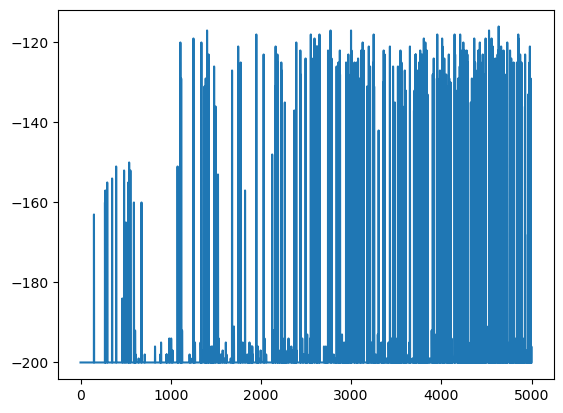

[[150.75738949335243, 510.7920157847337], [152.01768433216006, 511.4046762245469], [134.41138594098905, 1006.8592963463755]]


In [188]:
num_iterations = 5000
alpha = 0.05
gamma = 1.0

epsilon = 0.1

weights = [[0,0],[0,0],[0,0]]


def get_best_action(state):
    if random.random() < epsilon:
        return random.randint(0,2)
    best_action = 0
    best_action_value = -1000000
    for i in range(3):
        action_val = weights[i][0] * state[0] + weights[i][1] * state[1]
        if action_val > best_action_value:
            best_action = i
            best_action_value = action_val
    return best_action

def test_weights():
    epsilon = 0
    tot_reward = 0
    for i in range(100):
        state, info = env.reset()
        action = get_best_action(state)
        while True:
            next_state,reward, terminated, truncated, info = env.step(action)
            tot_reward += reward
            next_action = get_best_action(next_state)
            if terminated or truncated:
                break
            state = next_state
            action = next_action
    epsilon = 0.1
    return tot_reward / 100

env = gymnasium.make('MountainCar-v0')
rewards = []
for i in range(num_iterations):
    if(i % 100 == 0):
        print(f"Epoch {i} : {test_weights()}")
    state, info = env.reset()
    action = get_best_action(state)
    tot_reward = 0
    while True:
        next_state,reward, terminated, truncated, info = env.step(action)
        tot_reward += reward
        next_action = get_best_action(next_state)
        if terminated or truncated:
            weights[action][0] += alpha * (reward - (weights[action][0] * state[0] + weights[action][1] * state[1])) * state[0]
            weights[action][1] += alpha * (reward - (weights[action][0] * state[0] + weights[action][1] * state[1])) * state[1]
            rewards.append(tot_reward)
            break
        weights[action][0] += alpha * (reward + gamma * (weights[next_action][0] * next_state[0] + weights[next_action][1] * next_state[1]) - (weights[action][0] * state[0] + weights[action][1] * state[1])) * state[0]
        weights[action][1] += alpha * (reward + gamma * (weights[next_action][0] * next_state[0] + weights[next_action][1] * next_state[1]) - (weights[action][0] * state[0] + weights[action][1] * state[1])) * state[1]
        state = next_state
        action = next_action

plt.plot(rewards)
plt.show()
print(weights)

In [193]:
epsilon = 0.0
tot_reward = 0
for i in range(100):
    state, info = env.reset()
    action = get_best_action(state)
    while True:
        next_state,reward, terminated, truncated, info = env.step(action)
        tot_reward += reward
        next_action = get_best_action(next_state)
        if terminated or truncated:
            break
        state = next_state
        action = next_action
print(tot_reward / 100)

-168.17


In [218]:
tot_reward = 0
for i in range(1000):
    state, info = env.reset()
    was_going_forward = True
    action = 2
    while True:
        next_state,reward, terminated, truncated, info = env.step(action)
        tot_reward += reward
        next_action = 2 if next_state[1] > 0 else 0
        if terminated or truncated:
            break
        state = next_state
        action = next_action
print(tot_reward / 1000)

-119.57
